In [99]:
import statsmodels.api as sm

In [100]:
pip install pingouin

Note: you may need to restart the kernel to use updated packages.


In [101]:
import pingouin as pg

In [23]:
#  !pip install pingouin

# Doing Statistics on Data with the Pingouin Package

**Pingouin** is a new statistics package in Python that uses pandas, seaborn, and scipy-stats!  It's quite user-friendly and its documentation is good; let's use it to analyze some data!

https://pingouin-stats.org/index.html



## Fertility Dataset

### Load the Data

In [102]:
df = sm.datasets.fertility.load(as_pandas=True)['data']
df.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820,4.655,4.471,4.271,4.059,3.842,...,1.786,1.769,1.754,1.739,1.726,1.713,1.701,1.690,NaN,NaN
1,Andorra,AND,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.240,1.180,1.250,1.190,1.220,NaN,NaN,NaN
2,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.671,7.671,7.671,7.671,7.671,7.671,...,7.136,6.930,6.702,6.456,6.196,5.928,5.659,5.395,NaN,NaN


In [103]:
dfl=df.melt(
    id_vars=["Country Name"],
    value_vars=["1990", "2000", "2010"],
    var_name="Year",
    value_name="Fertility"
        )
dfl.Year=dfl.Year.astype(int)
dfl.dtypes
dfl.head()

dflall=df.melt(
    id_vars=["Country Name"],
    value_vars=df.columns[4:],
    var_name="Year",
    value_name="Fertility"
        )
dflall.Year=dflall.Year.astype(int)
dflall.dtypes
dflall.head()



,Country Name,Year,Fertility
0,Aruba,1960,4.820
1,Andorra,1960,NaN
2,Afghanistan,1960,7.671
3,Angola,1960,7.316
4,Albania,1960,6.186


### What significant differences are there between the fertility rates in 1990, 2000, and 2010?

### Parametric Tests

Follow the flowchart in the **ANOVA** section of the penguoin docs to test for differences in the mean fertility rate between these 3 years.  Even the deta is not homoscedastic, go ahead and do the anova and pairwise tests

https://pingouin-stats.org/guidelines.html#id5

In [104]:
pg.homoscedasticity(data=dfl, dv="Fertility", group='Year')

,W,pval,equal_var
levene,NaN,NaN,False


In [105]:
pg.welch_anova(data=dfl, dv="Fertility", between='Year')

,Source,ddof1,ddof2,F,p-unc,np2
0,Year,2,395.596872,20.457898,3.509968e-09,0.064404


### Nonparametric Tests

The data isn't normally distributred!  So let's do the same thing, but with the tests that don't need to make any assumptions about the distribution of our data.  Follow the flowchart in the **Non-Parametric** section of the penguoin docs to test for differences in the mean fertility rate between these 3 years.  

https://pingouin-stats.org/guidelines.html#id7

In [106]:
pg.kruskal(data=dfl, dv="Fertility", between='Year')

,Source,ddof1,H,p-unc
Kruskal,Year,2,36.316227,1.300264e-08


## Correlation Tests

Follow the flowchart in the **Non-Parametric** section of the penguoin docs to test for differences in the mean fertility rate between these 3 years.  

https://pingouin-stats.org/guidelines.html#id6

import seaborn as sn 
sns.jointplot(data=df1, x="Year", y="Fertility", kind="violin")

In [107]:
import seaborn as sns

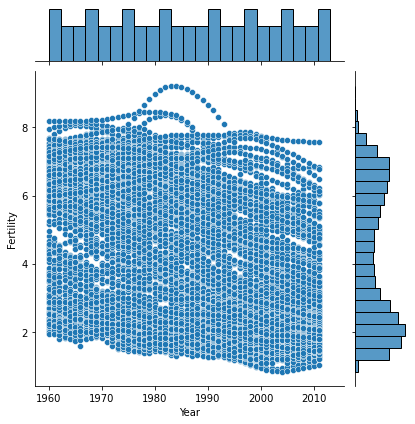

In [108]:
sns.jointplot(data=dflall, x="Year", y="Fertility", kind="scatter")

In [48]:
dfl

,Country Name,Year,Fertility
0,Aruba,1990,2.249
1,Andorra,1990,NaN
2,Afghanistan,1990,7.687
3,Angola,1990,7.165
4,Albania,1990,2.970
...,...,...,...
652,"Yemen, Rep.",2010,4.498
653,South Africa,2010,2.467
654,"Congo, Dem. Rep.",2010,6.251
655,Zambia,2010,5.813


In [109]:
pg.multivariate_normality(df[["1996", "1997", "2000"]])

HZResults(hz=7.934274361868822, pval=6.169845573800891e-38, normal=False)

In [110]:
pg.corr(df["2010"],df["2011"], method="pearson")

,n,r,CI95%,p-val,BF10,power
pearson,202,0.999476,"[1.0, 1.0]",5.704875e-300,nan,1.0


### Is there a significant correlation between time Germany's fertility rate and France's fertility rate?

In [111]:
dfger = dflall[dflall["Country Name"] == "Germany"]

In [115]:
dfger.head()

,Country Name,Year,Fertility
50,Germany,1960,2.37
269,Germany,1961,2.45
488,Germany,1962,2.44
707,Germany,1963,2.51
926,Germany,1964,2.54


In [116]:
dffra = dflall[dflall["Country Name"] == "France"]

In [117]:
dffra

,Country Name,Year,Fertility
64,France,1960,2.85
283,France,1961,2.87
502,France,1962,2.89
721,France,1963,2.89
940,France,1964,2.87
1159,France,1965,2.84
1378,France,1966,2.80
1597,France,1967,2.75
1816,France,1968,2.69
2035,France,1969,2.62


In [119]:
pg.corr(dfger.dropna()["Fertility"], dffra.dropna()["Fertility"], method= "pearson")

,n,r,CI95%,p-val,BF10,power
pearson,52,0.967571,"[0.94, 0.98]",1.533473e-31,9.07e+27,1.0


In [120]:
df.set_index("Country Name")
df.loc["Germany"]

KeyError: 'Germany'

### Is there a significant correlation between time Germany's fertility rate and India's fertility rate?

### Is there a significant correlation between time (Year) fertility rate?

Before running the correlation test, Get a new dataframe with just "Country Name", "Year", and "Fertility Rate" columns, and change the Year column to integers using the `DataFrame.melt()` method

*Hint*: A list of column names in a DataFrame is at `DataFrame.columns`
Get a new dataframe with just "Country Name", "Year", and "Fertility Rate" columns, and change the Year column to integers


### Is there a significant correlation between time (Year) and Germany's fertility rate?

## Further Reading

Nice article on Pingouin here: https://towardsdatascience.com/the-new-kid-on-the-statistics-in-python-block-pingouin-6b353a1db57c